<a href="https://colab.research.google.com/github/Negin1164/Python_Exercises/blob/main/week11_Python_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of contents**

1. [Hands on Exercise; Reading Titanic data from sklearn library](#Exercise) <br>
2. [Data Visualization I](#visI) <br>
    2.1. [Bar graph vs. Histogram](#bargraph) <br>
    2.2. [Box plot](#Box) <br>

3. [Grouping data in pandas data frames](#grouping) <br>
4. [lambda expressions](#lambda) <br>
    4.1. [Standard functions vs. lambda functions](#standard_functions) <br>
    4.2. [map and apply functions](#map) <br>
    4.3. [filter function](#filter) <br>
5. [Example: a synthetic data frame](#synthetic_data) <br>  
6. [Data Visualization II](#visII) <br>
    6.1. [Scatter plot](#scatter_plot) <br>
    6.2. [Heatmap](#heatmap) <br>
    6.3. [pie chart](#pie_chart) <br>  



## **1. Hands on Exercise; Reading Titanic data from sklearn library:**
<a name = 'Exercise'></a>

From sklearn library, The titanic dataset is loaded as a dictionary named `D`. The dictionary consists of several keys along with their assigned values. <br> 

a. Create a dataframe named df whose values in each column correspond to the values assigned to the mentioned dictionary' key called `data` and. Name the data frame columns' headings with the values assigned to D's key called `feature_names`. <br>

b. Add a new column to the data frame to store the values corresponding to D's key called `target` and name its heading as `survived`. <br>

In the data frame generated above, each column of data frame consist of one feature along with its corresponding values where each value or record in each row belong to a passenger. <br>

c. Find the distribution percentage of male vs female. <br>




In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

import pandas as pd
import numpy as np

In [ ]:
D = fetch_openml("titanic",version=1)

In [ ]:
# solution a

columns = D['feature_names']
data = D['data']
df = pd.DataFrame(columns=columns,data=data)

In [ ]:
# solution b

df['survived'] = D['target']

In [ ]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


In [ ]:
df['gender_numeric'] = [1 if row == 'female' else 0 for row in df['sex']]
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,gender_numeric
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,1
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0,0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,1


In [ ]:
df['sex_numeric'] = df['sex'].map({'female' : 1, 'male': 0})
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,gender_numeric,sex_numeric
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,1,1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,0,0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,1,1
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0,0,0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,1,1


In [ ]:
# solution c

df['sex'].value_counts(normalize=True).round(2) # classify data by number or count or size of each age rage

male      0.64
female    0.36
Name: sex, dtype: float64

In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 14 entries, pclass to survived
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


In [ ]:
# categorical data

for col in df.columns:
  if df[col].dtype == 'category':
    print(col)
    print('Number of categories',df[col].nunique())
    print('Categories values: ', df[col].unique(), end = '\n============\n')

sex
Number of categories 2
Categories values:  ['female', 'male']
Categories (2, object): ['female', 'male']
embarked
Number of categories 3
Categories values:  ['S', 'C', NaN, 'Q']
Categories (3, object): ['C', 'Q', 'S']
survived
Number of categories 2
Categories values:  ['1', '0']
Categories (2, object): ['0', '1']


## **2. Data Visualization I**
<a name = 'visI'></a>

## **2.1. Bar graph Vs. Histogram**
<a name = 'bargraph'></a>

Bar chart/bar graph is a visualization tool to plot the distribution of different values of a variable. The length of each bar in bar graph is proportional to the number of time each occurs in the dataset. <br>

Bar graph vs. Histogram: <br>
Histogram is used for plotting the distribution of continuous data where each bar shows the frequencey of the occuracne of a range of data values in the whole data set.



#### **Bar graph**

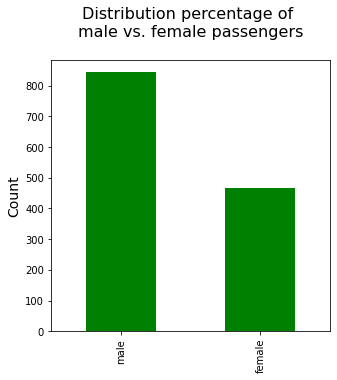

In [ ]:
import matplotlib.pyplot as plt

df['sex'].value_counts(normalize=False).round(2).plot(kind = 'bar', figsize=(5,5), color='green')
plt.title('Distribution percentage of \nmale vs. female passengers\n', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.show()

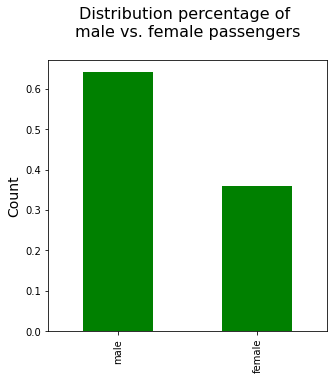

In [ ]:
import matplotlib.pyplot as plt

df['sex'].value_counts(normalize=True).round(2).plot(kind = 'bar', figsize=(5,5), color='green')
plt.title('Distribution percentage of \nmale vs. female passengers\n', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.show()

In [ ]:
df['sex'].value_counts(normalize=True)

male      0.644003
female    0.355997
Name: sex, dtype: float64

#### **Exercise:** <br>

Plot the distribution of survived vs. not survived.

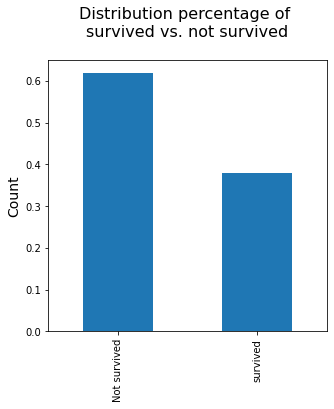

In [ ]:
df['survived'].value_counts(normalize=True).round(2).plot(kind = 'bar', figsize=(5,5))
plt.title('Distribution percentage of \nsurvived vs. not survived\n', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xticks([0,1], labels = ['Not survived', 'survived'])

plt.show()

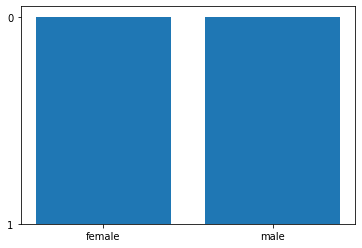

In [ ]:
df.groupby(['sex'])['survived'].size()
plt.bar(height='survived', x='sex',data=df)
plt.show()

In [ ]:
df.survived

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: category
Categories (2, object): ['0', '1']

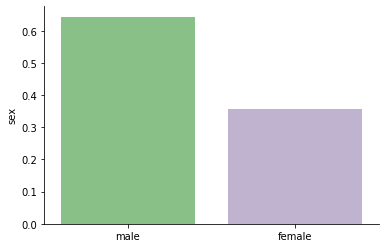

In [ ]:
import seaborn as sns
sns.barplot(x=['male','female'], y=df['sex'].value_counts(normalize=True), color='gray', palette='Accent')
sns.despine()
plt.show()

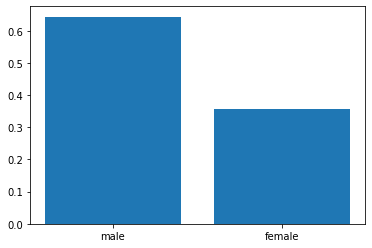

In [ ]:
import matplotlib.pyplot as plt
plt.bar(x=['male', 'female'], height=df['sex'].value_counts(normalize=True))
plt.show()

#### **Histogram**

In [ ]:
df.age.value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: age, Length: 98, dtype: int64

In [ ]:
df.age.nunique()

98

In [ ]:
df.age.value_counts(bins=10)
df.age.value_counts(bins=range(0,110,10), normalize=True, dropna=False) # divide age values into 10 ranges.

(20.0, 30.0]      0.275783
(30.0, 40.0]      0.160428
(10.0, 20.0]      0.123759
(40.0, 50.0]      0.100840
(-0.001, 10.0]    0.065699
(50.0, 60.0]      0.047364
(60.0, 70.0]      0.020626
(70.0, 80.0]      0.004584
(80.0, 90.0]      0.000000
(90.0, 100.0]     0.000000
Name: age, dtype: float64

In [ ]:
len(df[(df.age>20) & (df.age<=30)])/len(df)

0.2757830404889228

In [ ]:
df['age_range'] = pd.cut(df.age, bins=range(0,110,10))
df['age_range'].value_counts(dropna=False, normalize=True).round(2)

(20.0, 30.0]     0.28
NaN              0.20
(30.0, 40.0]     0.16
(10.0, 20.0]     0.12
(40.0, 50.0]     0.10
(0.0, 10.0]      0.07
(50.0, 60.0]     0.05
(60.0, 70.0]     0.02
(70.0, 80.0]     0.00
(80.0, 90.0]     0.00
(90.0, 100.0]    0.00
Name: age_range, dtype: float64

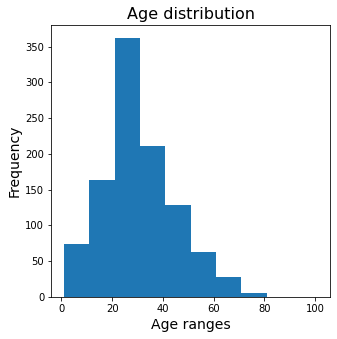

In [ ]:
df.age.plot(kind='hist', bins=range(1,110,10),figsize=(5,5))
plt.title('Age distribution', fontsize=16)
plt.xlabel('Age ranges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

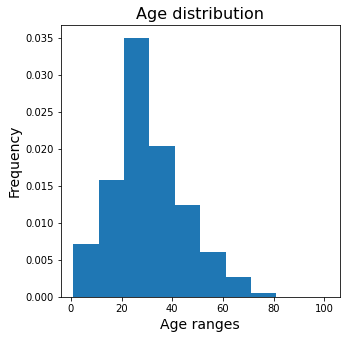

In [ ]:
df.age.plot(kind='hist', bins=range(1,110,10),figsize=(5,5),density=True)
plt.title('Age distribution', fontsize=16)
plt.xlabel('Age ranges', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

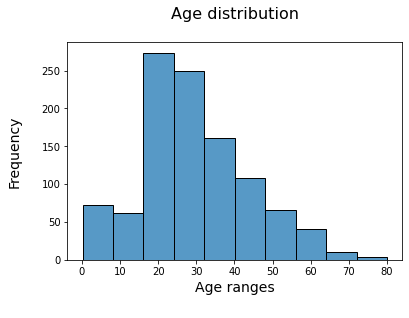

In [ ]:
sns.histplot(x = df['age'], bins=10)
plt.title('Age distribution\n', fontsize=16)
plt.xlabel('Age ranges\n', fontsize=14)
plt.ylabel('Frequency\n', fontsize=14)
plt.show()

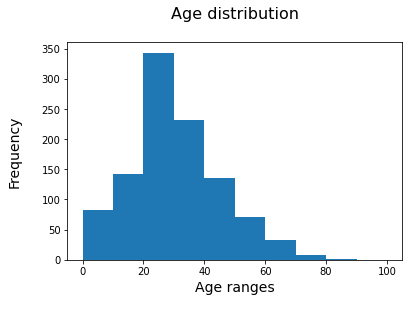

In [ ]:
plt.hist(x=df.age, bins=range(0,110,10))
plt.title('Age distribution\n', fontsize=16)
plt.xlabel('Age ranges\n', fontsize=14)
plt.ylabel('Frequency\n', fontsize=14)
plt.show()

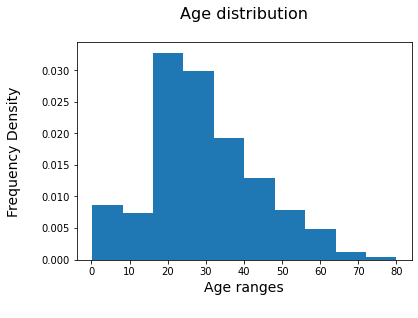

In [ ]:
plt.hist(x=df.age,density=True, bins=10)
plt.title('Age distribution\n', fontsize=16)
plt.xlabel('Age ranges\n', fontsize=14)
plt.ylabel('Frequency Density\n', fontsize=14)
plt.show()

$\text{Frequency Density} = \Large{\frac{\text{Frequency}}{\text{bin_width}}}$

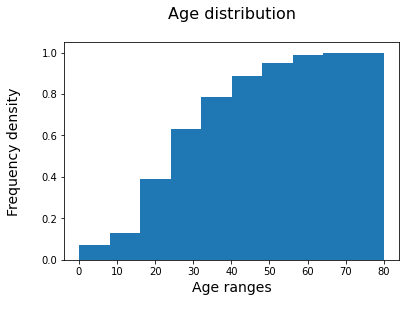

In [ ]:
plt.hist(x=df.age,cumulative=True, bins=10, density=True)
plt.title('Age distribution\n', fontsize=16)
plt.xlabel('Age ranges\n', fontsize=14)
plt.ylabel('Frequency density\n', fontsize=14)
plt.show()

#### **Plot the distribution of fare**

In [ ]:
#counts, bin_age = np.histogram(df['fare'].value_counts(bins=10))
#df.fare.plot(kind='hist', bins=10, xticks=bin_age)

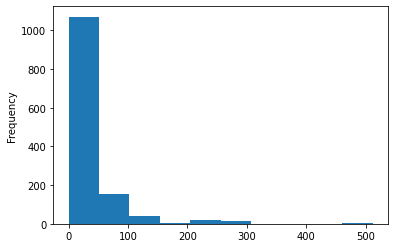

In [ ]:
df.fare.plot(kind='hist', bins=10)
plt.show()

In [ ]:
df.fare.value_counts(normalize=True, bins=10).round(2)

(-0.513, 51.233]      0.82
(51.233, 102.466]     0.12
(102.466, 153.699]    0.03
(204.932, 256.165]    0.02
(256.165, 307.398]    0.01
(153.699, 204.932]    0.00
(461.096, 512.329]    0.00
(307.398, 358.63]     0.00
(358.63, 409.863]     0.00
(409.863, 461.096]    0.00
Name: fare, dtype: float64

## **2.2. Box plot**
<a name = 'Box'></a>



In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 15 entries, pclass to age_range
dtypes: category(4), float64(6), object(5)
memory usage: 118.6+ KB


In [ ]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,age_range
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,"(20, 30]"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,"(0, 10]"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,"(0, 10]"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0,"(20, 30]"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,"(20, 30]"


In [ ]:
df.describe(include='all')

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,age_range
count,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745,1309,1046
unique,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369,2,8
top,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY",0,"(20, 30]"
freq,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64,809,361
mean,2.294882,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN,NaN,NaN
std,0.837836,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN,NaN,NaN
min,1.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN,NaN,NaN
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN,NaN,NaN


In [ ]:
df.age.describe().mean()

157.307666776544

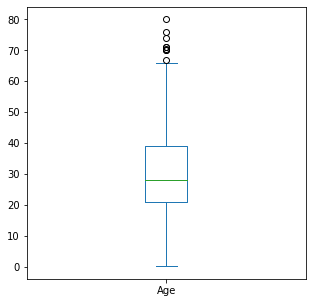

In [ ]:
df.age.plot(kind='box', figsize=(5,5), label='Age')
plt.show()

In [ ]:
df.age.quantile(0.25)
df.age.quantile(0.5)
df.age.quantile(0.75)
Iq = df.age.quantile(0.75) - df.age.quantile(0.25)
Iq
lower_bound = df.age.quantile(0.25) - 1.5*Iq
upper_bound = df.age.quantile(0.75) + 1.5*Iq
print(lower_bound,upper_bound)

-6.0 66.0


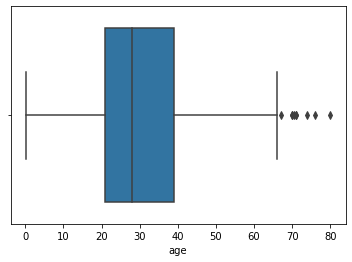

In [ ]:
sns.boxplot(x='age', data=df)
plt.show()

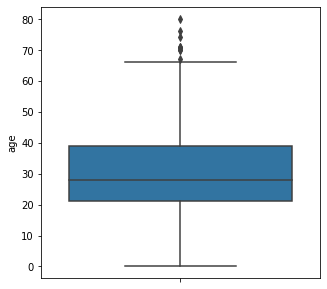

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='age', data=df)
plt.show()

In [ ]:
df.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,388.0,28.687071,14.576995,0.1667,19.0,27.0,38.0,76.0
male,658.0,30.585233,14.280571,0.3333,21.0,28.0,39.0,80.0


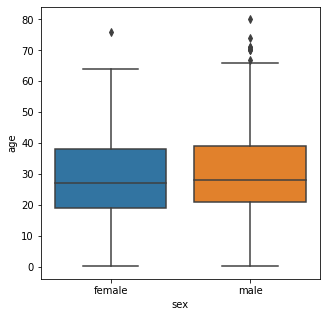

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='age', data=df, x='sex')
plt.show()

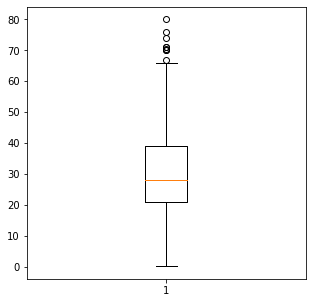

In [ ]:
plt.figure(figsize=(5,5))
plt.boxplot(df['age'].dropna()) 
plt.show()

# in matplotlib library if you use boxplot without excluding missing values, then it generate an empty figure!

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


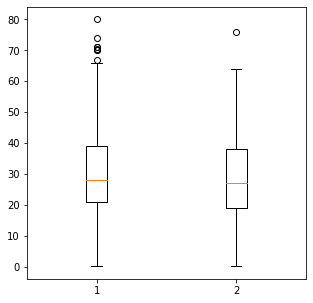

In [ ]:
plt.figure(figsize=(5,5))
plt.boxplot([df[df['sex'] == 'male']['age'].dropna(), df[df['sex'] == 'female']['age'].dropna()]) 
plt.show()

In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 15 entries, pclass to age_range
dtypes: category(3), float64(6), int64(1), object(5)
memory usage: 127.7+ KB


In [ ]:
df['survived']=df['survived'].astype(int)


# **3. Grouping data in pandas data frames:** 
<a name = 'grouping' ></a>

`groupby()` vs. `pivot_table()` <br>

Pivot table is used for multi-dimensional (>2 dimension) grouping. 

In [ ]:
df.groupby('age_range').size()

age_range
(0, 10]       86
(10, 20]     162
(20, 30]     361
(30, 40]     210
(40, 50]     132
(50, 60]      62
(60, 70]      27
(70, 80]       6
(80, 90]       0
(90, 100]      0
dtype: int64

In [ ]:
df.groupby(['age_range','sex']).size()

age_range  sex   
(0, 10]    female     41
           male       45
(10, 20]   female     68
           male       94
(20, 30]   female    126
           male      235
(30, 40]   female     75
           male      135
(40, 50]   female     46
           male       86
(50, 60]   female     25
           male       37
(60, 70]   female      6
           male       21
(70, 80]   female      1
           male        5
(80, 90]   female      0
           male        0
(90, 100]  female      0
           male        0
dtype: int64

In [ ]:
df.groupby(['age_range','sex','survived'],as_index=False)['ticket'].size()

,age_range,sex,survived,size
0,"(0, 10]",female,0,16
1,"(0, 10]",female,1,25
2,"(0, 10]",male,0,20
3,"(0, 10]",male,1,25
4,"(10, 20]",female,0,18
5,"(10, 20]",female,1,50
6,"(10, 20]",male,0,80
7,"(10, 20]",male,1,14
8,"(20, 30]",female,0,35
9,"(20, 30]",female,1,91


In [ ]:
# more granular classification
# number of tickets purchased by each age range and gender   

pd.pivot_table(df, index='age_range', columns='sex', values = 'ticket', aggfunc=len, fill_value=0, margins=True)

# fill_value is specified to replace missing values; default in None
# margins: sum of all rows and all column
# dropna: when is True (default value), the missing values are not included.

sex,female,male,All
age_range,,,
"(0, 10]",41,45,86
"(10, 20]",68,94,162
"(20, 30]",126,235,361
"(30, 40]",75,135,210
"(40, 50]",46,86,132
"(50, 60]",25,37,62
"(60, 70]",6,21,27
"(70, 80]",1,5,6
All,388,658,1046


In [ ]:
df['age'].agg(func=np.max)
df['age'].agg(func=[np.min,np.mean,np.max,len])

amin       0.166700
mean      29.881135
amax      80.000000
len     1309.000000
Name: age, dtype: float64

In [ ]:
pd.pivot_table(df, index='age_range', columns='sex', values = 'ticket', aggfunc=len, fill_value=0, margins=True, margins_name='Total')

sex,female,male,Total
age_range,,,
"(0, 10]",41,45,86
"(10, 20]",68,94,162
"(20, 30]",126,235,361
"(30, 40]",75,135,210
"(40, 50]",46,86,132
"(50, 60]",25,37,62
"(60, 70]",6,21,27
"(70, 80]",1,5,6
Total,388,658,1046


In [ ]:
df.groupby(['age_range','sex'],as_index=False)['ticket'].size()

,age_range,sex,size
0,"(0, 10]",female,41
1,"(0, 10]",male,45
2,"(10, 20]",female,68
3,"(10, 20]",male,94
4,"(20, 30]",female,126
5,"(20, 30]",male,235
6,"(30, 40]",female,75
7,"(30, 40]",male,135
8,"(40, 50]",female,46
9,"(40, 50]",male,86


In [ ]:
pd.pivot_table(df, index='age_range', columns=['sex','survived'], values = 'ticket', aggfunc=len, fill_value=0, margins=True)

sex       female      male        All
survived       0    1    0    1      
age_range                            
(0, 10]       16   25   20   25    86
(10, 20]      18   50   80   14   162
(20, 30]      35   91  192   43   361
(30, 40]      14   61  107   28   210
(40, 50]      10   36   70   16   132
(50, 60]       2   23   30    7    62
(60, 70]       1    5   20    1    27
(70, 80]       0    1    4    1     6
All           96  292  523  135  1046

In [ ]:
# more granular classification   

pd.pivot_table(df, index=['sex','survived'], values = ['age', 'ticket'] , aggfunc={'age':np.mean, 'ticket': len}, fill_value=0)

age  ticket
sex    survived                   
female 0         25.255208     127
       1         29.815354     339
male   0         31.516412     682
       1         26.977778     161

In [ ]:
# determine the number of tickets purchased by female and male who did not survived vs those who did.
# 

pd.pivot_table(df, index=['sex','survived'], values = ['age', 'ticket'] , aggfunc={'age':[np.mean, np.min, np.max], 'ticket': len}, fill_value=0)

age                    ticket
                amax    amin       mean    len
sex    survived                               
female 0          63  1.0000  25.255208    127
       1          76  0.1667  29.815354    339
male   0          74  0.3333  31.516412    682
       1          80  0.4167  26.977778    161

In [ ]:
pd.pivot_table(df, index=['sex','survived'], values = ['age', 'ticket'] , aggfunc={'age':[np.mean, np.min, np.max], 'ticket': len}, fill_value=0).reset_index()

sex survived  age                    ticket
                   amax    amin       mean    len
0  female        0   63  1.0000  25.255208    127
1  female        1   76  0.1667  29.815354    339
2    male        0   74  0.3333  31.516412    682
3    male        1   80  0.4167  26.977778    161

In [ ]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,age_range
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,"(20, 30]"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,"(0, 10]"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,"(0, 10]"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0,"(20, 30]"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0,"(20, 30]"


## **4. lambda expressions**
<a name = 'lambda'></a>

## **4.1. Standard function vs. lambda function:** <br>
<a name = 'standard_functions'></a>

Before we move to the next example: I want to remind you about the functions that we created using key word function def (stands for define), This functions can take an argument and returns the argument and outputs and are written in multiple lines of codes. This types of functions are knowns as standard functions and They are usually used many times in the program.<br>

    def function_name(input1, input2, ...):    
        block of code 
        return output1, output2, ...

On the other hand anynomous functions are defined by lambda keyword and are without a name. They are written in a single line and are intended for a single use in the program. The construction is:


    lambda argument: expression

A lambda function can’t contain any statements like return, pass, assert, or raise, otherwise it will raise syntax error.  

Unlike standard function that might return none or more values, lambda function returns at least one value.

Example: <br> 

write x+1 as a function <br>

a. standard function <br>
b. anynomous function

In [ ]:
# a. standard function

def welcome_message():
  print('Welcome!')

def add_one(x):
  x = x + 1
  return x 

def add_one(x):
  return x + 1
 

In [ ]:
def add_one3(x,y):
  return x + 1

add_one3(x=3) 

In [ ]:
# b. anynomous function

lambda x: x+1  # note that the arguments don’t have parentheses around them


f = lambda x: x+1 
f(x=3)

# or 
(lambda x: x+1)(3) 

In [ ]:
def sum_operation(x,y):
  return x+y

sum_operation(x=2,y=9)  

In [ ]:
f = lambda x,y: x+y

f(x=2,y=9)


In [ ]:
(lambda x,y: x+y)(3,y=6)

In [ ]:
(lambda x,y,s=10: (x+y)/s)(3,y=6)

In [ ]:
f = lambda *args: min(args)

f(1,2,3)

1

In [ ]:
f(1)

f(1,2,3, 0.2)

0.2

In [ ]:
(lambda **kwargs: sum(kwargs.values()))(x=1,y=2,z=3)



(lambda *kwargs: sum(kwargs))(1,2,3)

6

In [ ]:
def add(*x):
  return sum(x) + 1

add(1)
add(2,65,9)  

77

In [ ]:
def add(**x):
  return sum(x.values()) + 1

add(x=10,y=65,z=9)  

85

The *args and **kwargs keywords allow you passing any number of arguments to a function and so make your code more flexible. <br>
The *args keyword sends a list of values to a function. **kwargs sends a dictionary with values associated with keywords to a function. 

In [ ]:
(lambda x,y : assert x%y == 2)(8,4) # assert that x devided by y is 2 

SyntaxError: ignored

In [ ]:
(lambda x, y : 
 (x>y and x!=0))(5,3)  # this is still one expression

True

Calculate the hypotenuse of a right-angle triangle.

In [ ]:
import math
import numpy as np

(lambda x,y: math.sqrt(x**2+y**2))(3,4)
(lambda x,y: np.sqrt(x**2+y**2))(3,4)
(lambda x,y: pow((x**2+y**2),0.5))(3,4)

5.0

## **4.2. map and apply functions**
<a name = 'map'></a>

`map(function, iterable data type)` <br>

map will apply the given function to all element of the given iterable data.

In [ ]:
f = lambda x: x**2

map(f, range(10))

print(list(range(10)))
list(map(f, range(10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
list(map(lambda x: x**2, range(10)))

In [ ]:
def squared(x):
  return x**2

list(map(squared, range(10)))  
 

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [ ]:
[i**2 for i in range(10)]

In [ ]:
import pandas as pd

pd.Series(range(10)).map(lambda x: x**2)

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int64

In [ ]:
pd.Series(range(10)).apply(lambda x: x**2)

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int64

In [ ]:
pd.Series(range(10)).apply(squared)

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int64

## You're given the full name of several students. Use lambda function and list comprehension to get the initials. For example, Joe Smith --> 'JS' and 'Sarah Mary Jackson' --> 'SJ'.

## Note that names can contains 

In [ ]:
'Dina Mcfarlane'.split()

#'      Dina Mcfarlane     '.strip()
#'Dina Mcfarlane,'.strip(',')

['Dina', 'Mcfarlane']

In [ ]:
'Dina Mcfarlane'.split()[0][0]

'D'

In [ ]:
#!pip install names
import names

Names = [names.get_full_name() for i in range(5)]
Names

['Bruce Gonzalez',
 'Damian Shimmin',
 'Doris Reynolds',
 'Deanne Palumbo',
 'Carolyn Nemoede']

In [ ]:
F = lambda Name: Name.split()[0][0] + Name.split()[-1][0]

L =[(lambda Name: Name.split()[0][0] + Name.split()[-1][0])(N) for N in Names]


L = [F(N) for N in Names]

In [ ]:
list(map(F,Names))

['BG', 'DS', 'DR', 'DP', 'CN']

In [ ]:
import pandas as pd
pd.Series(Names).map(lambda Name: Name.split()[0][0] + Name.split()[-1][0])



0    BG
1    DS
2    DR
3    DP
4    CN
dtype: object

## You are given the the list :['xyz123', '1717abc', '9 ttt 9']. Use the map function to match the number of digits in each list element. For example 'xyz123' --> 3, '9 ttt 9' --> 2

In [ ]:
(lambda String: len([ch for ch in String if ch.isdigit()]))('9 ttt 9')


f = lambda String: len([ch for ch in String if ch.isdigit()])


list(map(f, ['xyz123', '1717abc', '9 ttt 9']))

[3, 4, 2]

In [ ]:
f = lambda String: len([ch for ch in String if ch.isdigit()])
list(map(f, input('write a string')))  


write a stringhghgsdhgfg34cvv7


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]

Notice that map function takes two input, the first is a function and the second is an iterable object or data type. <br>
In this example, string is indeed an iterable object. the lamdba function is applied to each character of the given string, if it is a digit character, it will return 1 (one character and that is digit character!) otherwise it returns 0 (one character but it is alphabet, so number of digit character is zero!)

## **4.3. filter function**
<a name = 'filter'></a>

`filter(predicate function, iterable data)`

filter will return a list of elements of the given iterable data that satisfies the predicate function. <br>

predicate functions are those which return True or False.



In [ ]:
(lambda x: x%2 == 0)(2)

True

In [ ]:
list(filter(lambda x: x%2 == 0, range(10)))

[0, 2, 4, 6, 8]

In [ ]:
list(filter(lambda x: x%2==0, map(lambda x: x**2, range(10))))

## You are given the the list :['xyz', '1x2y3', '999', 'abcd']. Use the filter  function to select only the elements which do not include digits ('xyz', and 'abcd').

In [ ]:
f = lambda String: len(String) == len([ch for ch in String if ch.isalpha()])
L = ['xyz', '1x2y3', '999', 'abcd']
list(filter(f, L))

['xyz', 'abcd']

In [ ]:
# or 
import string
f = lambda String: len(String)==len(''.join([ch for ch in String if ch not in string.digits]))
L = ['xyz', '1x2y3', '999', 'abcd']
list(filter(f, L))

['xyz', 'abcd']

## **5. Example: a synthetic data frame**
<a name = 'synthetic_data'></a>

Create a data of 5000 rows and 5 columns. 

Columns include:

- date (dates are within Jan 1st, 2022 and Dec 31, 2022)
- products which include Toy, Clothing, Food, Drink, Video Game
- price; average price of all products are $10 with standard deviation of $2.
- salesperson are Alex, Amanda, Anna, Ahmed, Sarah
- customer satisfaction with maximum rate to be 5.

In [82]:
import numpy as np
import pandas as pd
nrows = 5000
days = pd.date_range('2022-01-01', '2022-12-31', freq='D')
days

dt  = np.random.choice(days, size=nrows, replace=True)

products = ['Toy', 'Clothing', 'Food', 'Drink', 'Video Game']
categ = np.random.choice(products, size=nrows, replace=True, 
                         p=[0.1, 0.1, 0.35, 0.35, 0.1])

price = np.random.normal(10, 2, size=nrows)
emps = ['Alex', 'Amanda', 'Anna', 'Ahmed', 'Sarah']
salesperson = np.random.choice(emps, replace=True, size=nrows, 
                               p=[0.1, 0.05, 0.55, 0.2, 0.1])

df = pd.DataFrame({'DT':dt, 'Categ':categ, 'SalesPerson':salesperson, 'Price':price})


# Add customer satisfaction
avg = {'Alex':3.1, 'Amanda':3.8, 'Anna':4.7, 'Ahmed':4, 'Sarah':2.5}
df['Cust_Satisfaction'] = df.SalesPerson.apply(lambda x: min(np.random.normal(avg[x], 0.2),5) )


# Making the sales vary by days
df.Price = np.where(df.DT.dt.strftime('%a').isin(['Sat', 'Sun']), 1.3*df.Price, df.Price)
df.Price = np.where(df.DT.dt.strftime('%a').isin(['Tue', 'Wed']), 0.75*df.Price, df.Price)

display(df.head())

,DT,Categ,SalesPerson,Price,Cust_Satisfaction
0,2022-06-12,Drink,Anna,8.180088,4.811239
1,2022-10-08,Food,Anna,10.200667,4.600739
2,2022-02-14,Drink,Anna,9.972849,4.774085
3,2022-03-12,Drink,Ahmed,13.945714,4.121569
4,2022-04-26,Food,Amanda,9.393910,3.601824


In [83]:
df.describe(include = 'all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,DT,Categ,SalesPerson,Price,Cust_Satisfaction
count,5000,5000,5000,5000.000000,5000.000000
unique,365,5,5,NaN,NaN
top,2022-09-04 00:00:00,Drink,Anna,NaN,NaN
freq,27,1825,2738,NaN,NaN
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2022-12-31 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.220440,4.128025
std,NaN,NaN,NaN,2.887152,0.775012
min,NaN,NaN,NaN,2.824002,1.827929
25%,NaN,NaN,NaN,8.068285,3.770608


[`df.DT.dt.strftime('%a')`](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html) $\to$ Return an Index of formatted strings specified by date_format


[%a](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) $\to$ Weekday as locale’s abbreviated name

**Round the two numerical columns to two-digits after the decimal**

In [84]:
df.Price = df.Price.round(2)
df.Cust_Satisfaction = df.Cust_Satisfaction.round(2)
df.head()  

,DT,Categ,SalesPerson,Price,Cust_Satisfaction
0,2022-06-12,Drink,Anna,8.18,4.81
1,2022-10-08,Food,Anna,10.20,4.60
2,2022-02-14,Drink,Anna,9.97,4.77
3,2022-03-12,Drink,Ahmed,13.95,4.12
4,2022-04-26,Food,Amanda,9.39,3.60


In [85]:
df.sort_values('Categ')

,DT,Categ,SalesPerson,Price,Cust_Satisfaction
1714,2022-12-02,Clothing,Anna,9.46,4.36
3502,2022-04-23,Clothing,Anna,13.27,5.00
427,2022-07-25,Clothing,Alex,10.67,2.97
2286,2022-09-30,Clothing,Anna,13.78,4.56
4169,2022-10-02,Clothing,Anna,12.72,5.00
...,...,...,...,...,...
4155,2022-03-12,Video Game,Ahmed,16.51,3.70
4163,2022-02-25,Video Game,Alex,8.82,3.16
2438,2022-12-16,Video Game,Anna,8.22,4.23
452,2022-10-06,Video Game,Ahmed,9.69,3.63


# Exercise: 

1. find the total price for each food category; <br>

    a. groupby() <br>

    b. pivot table <br>

2. find the total and minimum price for each food category; <br>

3. find the total price and max price for each salesperson in each food category <br>

4. find the total price and max price for each salesperson in each food category as well as average Cust_Satisfaction. <br>

## **solution:**#

In [ ]:
# 1. from scratch 
total_price = df[df['Categ'] == 'Clothing']['Price'].sum()

In [ ]:
# 1. from scratch
for cat in df['Categ'].unique():
  total_price = df[df['Categ'] == cat]['Price'].sum()
  print(cat, total_price)

Toy 4827.443200191304
Drink 18121.939552699514
Food 17514.837206038195
Video Game 5082.373894486053
Clothing 5310.652727120774


In [ ]:
# 1. using groupby()
df.groupby(['Categ'],as_index=False)['Price'].sum()

,Categ,Price
0,Clothing,5310.652727
1,Drink,18121.939553
2,Food,17514.837206
3,Toy,4827.443200
4,Video Game,5082.373894


In [ ]:
df.Categ.unique()

array(['Toy', 'Drink', 'Food', 'Video Game', 'Clothing'], dtype=object)

In [ ]:
# 1. using pivot table

pd.pivot_table(df, index='Categ', values = 'Price', aggfunc=np.sum, fill_value=0)

,Price
Categ,
Clothing,5310.652727
Drink,18121.939553
Food,17514.837206
Toy,4827.443200
Video Game,5082.373894


In [ ]:
# 2
pd.pivot_table(df, index='Categ', values = 'Price', aggfunc=[np.sum,np.min], fill_value=0)

,amin,sum
Categ,,
Clothing,3.522621,5310.652727
Drink,2.017123,18121.939553
Food,3.244983,17514.837206
Toy,4.082958,4827.443200
Video Game,2.757171,5082.373894


In [ ]:
# 3
pd.pivot_table(df, index=['Categ','SalesPerson' ], values = 'Price', aggfunc=[np.sum, np.min, np.max])

sum      amin       amax
                               Price     Price      Price
Categ      SalesPerson                                   
Clothing   Ahmed         1159.975282  4.955676  17.950458
           Alex           579.881368  5.489123  17.999892
           Amanda         233.063762  6.030859  17.516205
           Anna          2870.198092  3.522621  19.799650
           Sarah          467.534223  3.852601  16.259661
Drink      Ahmed         3562.694734  3.538327  18.613207
           Alex          1769.455234  3.783567  17.970011
           Amanda         972.640729  5.381225  18.054838
           Anna         10039.621106  2.017123  19.334446
           Sarah         1777.527750  3.806892  18.835204
Food       Ahmed         3604.529507  3.825855  18.749674
           Alex          1905.278747  4.195953  19.105721
           Amanda         802.066281  3.244983  17.810613
           Anna          9222.125595  3.355156  18.461330
           Sarah         1980.837076  4.206409  19.444709
Toy        Ahmed         1095.347829  5.059363  18.224403
           Alex           405.052093  5.183560  18.378073
           Amanda         216.045351  5.387987  16.624085
           Anna          2718.682965  4.082958  19.325400
           Sarah          392.314962  4.406222  14.842337
Video Game Ahmed         1025.624351  4.461318  16.186861
           Alex           497.873719  4.286865  17.212800
           Amanda         207.393380  6.883456  15.634083
           Anna          2822.796629  2.757171  18.695221
           Sarah          528.685816  4.928685  17.354707

In [ ]:
pd.pivot_table(df, index=['Categ','SalesPerson'], values = ['Price','Cust_Satisfaction'], aggfunc={'Price':[np.sum, np.min, np.max],'Cust_Satisfaction':np.mean})

Cust_Satisfaction      Price                        
                                    mean       amax      amin           sum
Categ      SalesPerson                                                     
Clothing   Ahmed                3.993805  17.950458  4.955676   1159.975282
           Alex                 3.055045  17.999892  5.489123    579.881368
           Amanda               3.834834  17.516205  6.030859    233.063762
           Anna                 4.686351  19.799650  3.522621   2870.198092
           Sarah                2.517771  16.259661  3.852601    467.534223
Drink      Ahmed                4.000417  18.613207  3.538327   3562.694734
           Alex                 3.096481  17.970011  3.783567   1769.455234
           Amanda               3.770107  18.054838  5.381225    972.640729
           Anna                 4.702086  19.334446  2.017123  10039.621106
           Sarah                2.481554  18.835204  3.806892   1777.527750
Food       Ahmed                3.989631  18.749674  3.825855   3604.529507
           Alex                 3.098206  19.105721  4.195953   1905.278747
           Amanda               3.818181  17.810613  3.244983    802.066281
           Anna                 4.695352  18.461330  3.355156   9222.125595
           Sarah                2.510955  19.444709  4.206409   1980.837076
Toy        Ahmed                3.976871  18.224403  5.059363   1095.347829
           Alex                 3.121634  18.378073  5.183560    405.052093
           Amanda               3.859922  16.624085  5.387987    216.045351
           Anna                 4.694455  19.325400  4.082958   2718.682965
           Sarah                2.487600  14.842337  4.406222    392.314962
Video Game Ahmed                3.973200  16.186861  4.461318   1025.624351
           Alex                 3.117436  17.212800  4.286865    497.873719
           Amanda               3.855597  15.634083  6.883456    207.393380
           Anna                 4.706643  18.695221  2.757171   2822.796629
           Sarah                2.454651  17.354707  4.928685    528.685816

In [ ]:
df.info()

In [ ]:
pd.pivot_table(df, index=['Categ','SalesPerson'], values = ['Price','Cust_Satisfaction'], aggfunc={'Price':[np.sum, np.min, np.max],'Cust_Satisfaction':[np.sum, np.min, np.max]})

Cust_Satisfaction                             Price  \
                                    amax      amin          sum       amax   
Categ      SalesPerson                                                       
Clothing   Ahmed                4.384579  3.575226   447.306193  17.950458   
           Alex                 3.426231  2.532827   164.972419  17.999892   
           Amanda               4.262326  3.570669    88.201183  17.516205   
           Anna                 5.000000  4.126737  1330.923617  19.799650   
           Sarah                2.808125  2.116095   113.299679  16.259661   
Drink      Ahmed                4.600530  3.495004  1372.142943  18.613207   
           Alex                 3.479043  2.704815   538.787751  17.970011   
           Amanda               4.256478  3.404717   354.390013  18.054838   
           Anna                 5.000000  4.037922  4659.767085  19.334446   
           Sarah                3.007863  1.771408   439.235053  18.835204   
Food       Ahmed                4.522869  3.450209  1440.256819  18.749674   
           Alex                 3.620718  2.601009   573.168134  19.105721   
           Amanda               4.348593  3.435209   297.818088  17.810613   
           Anna                 5.000000  4.104333  4258.684488  18.461330   
           Sarah                3.081156  2.000621   479.592471  19.444709   
Toy        Ahmed                4.413828  3.452667   397.687094  18.224403   
           Alex                 3.518149  2.776331   118.622105  18.378073   
           Amanda               4.166824  3.568684    88.778204  16.624085   
           Anna                 5.000000  4.160890  1276.891869  19.325400   
           Sarah                3.001281  2.015152   109.454379  14.842337   
Video Game Ahmed                4.423287  3.518431   409.239618  16.186861   
           Alex                 3.617589  2.748705   158.989261  17.212800   
           Amanda               4.418474  3.408437    77.111939  15.634083   
           Anna                 5.000000  4.168494  1303.740196  18.695221   
           Sarah                2.833721  1.848944   130.096516  17.354707   

                                                
                            amin           sum  
Categ      SalesPerson                          
Clothing   Ahmed        4.955676   1159.975282  
           Alex         5.489123    579.881368  
           Amanda       6.030859    233.063762  
           Anna         3.522621   2870.198092  
           Sarah        3.852601    467.534223  
Drink      Ahmed        3.538327   3562.694734  
           Alex         3.783567   1769.455234  
           Amanda       5.381225    972.640729  
           Anna         2.017123  10039.621106  
           Sarah        3.806892   1777.527750  
Food       Ahmed        3.825855   3604.529507  
           Alex         4.195953   1905.278747  
           Amanda       3.244983    802.066281  
           Anna         3.355156   9222.125595  
           Sarah        4.206409   1980.837076  
Toy        Ahmed        5.059363   1095.347829  
           Alex         5.183560    405.052093  
           Amanda       5.387987    216.045351  
           Anna         4.082958   2718.682965  
           Sarah        4.406222    392.314962  
Video Game Ahmed        4.461318   1025.624351  
           Alex         4.286865    497.873719  
           Amanda       6.883456    207.393380  
           Anna         2.757171   2822.796629  
           Sarah        4.928685    528.685816

## **6. Data Visualization II**
<a name = visII></a>

## **6.1. Scatter plot**
<a name = 'scatter_plot'></a>

a visualization function to displays values two variables versus each other.
Scatter plot helps determining whether there is any correlation between the two variables.

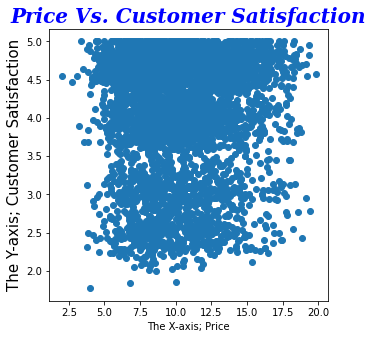

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))

plt.scatter(x='Price', y='Cust_Satisfaction', data=df, marker='o')

sns.despine(top=False, right=False, left=False, bottom=False)
plt.xlabel('The X-axis; Price')
plt.ylabel('The Y-axis; Customer Satisfaction', fontsize=15)
plt.title('Price Vs. Customer Satisfaction', fontdict={'family':'serif', 
                                                       'style': 'italic', 
                                                       'weight':'bold',
                                                       'color':'blue', 
                                                       'size':20})
plt.show()

(0.0, 30.0)

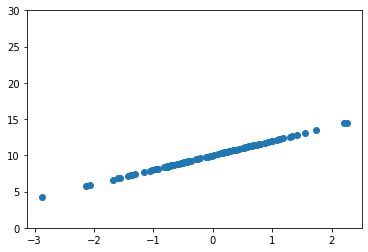

In [86]:
x = np.random.normal(0,1,100)
y = 2*x + 10

plt.scatter(x,y)
plt.ylim(0,30)

[font family documentation](https://matplotlib.org/stable/tutorials/text/text_props.html)

**Show the total sale in each category**

In [ ]:
res = df.groupby('Categ', as_index=False).Price.sum()
res.head()

In [ ]:
sns.barplot(x='Categ', y='Price', data=res)
plt.show()

Text(0, 0.5, 'Total Sales in USD')

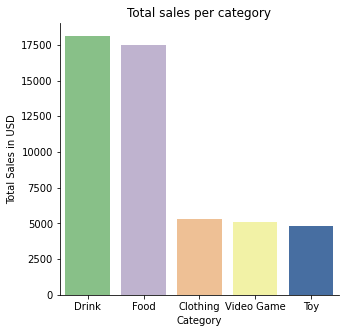

In [ ]:
res = df.groupby('Categ', as_index=False).Price.sum().sort_values(by='Price', ascending=False)

plt.figure(figsize=(5,5))


sns.barplot(x='Categ', y='Price', data = res, color='gray')
# or
sns.barplot(x='Categ', y='Price', data = res, palette='Accent')

sns.despine()
plt.title('Total sales per category')
plt.xlabel('Category')
plt.ylabel('Total Sales in USD')

[seaborn colormaps](https://seaborn.pydata.org/tutorial/color_palettes.html) <br>
[matplotlib colormaps](https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html)<br>

**Show the total sale by each weekly day**

(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fa7b0fa90>,
       dtype=object))

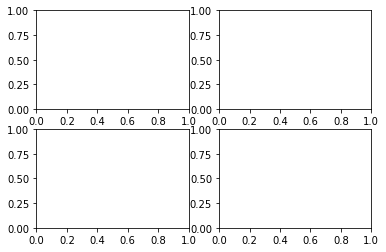

In [ ]:
plt.figure()
plt.scatter(x,y)
plt.scatter(x,z)
plt.show()

#####

plt.figure()

plt.subplot(2,2, 0)
plt.scatter(x,y)
plt.scatter(y,z)

plt.subplot(2,2, 1)
plt.scatter()

########
fig, ax= plt.subplots(1,1)
ax.scatter(x,y)
ax.scatter(y,z)


########
fig, ax= plt.subplots(2,2)
ax[0].scatter(x,y)
ax[0].scatter(y,z)

ax[1].box(y)



In [ ]:
plt.figure()

plt.subplot(2,2, 1)
plt.scatter()

plt.subplot(2,2, 1)
plt.scatter()

Text(0, 0, 'Mon')
Mon
Text(0, 0, 'Tue')
Tue
Text(0, 0, 'Wed')
Wed
Text(0, 0, 'Thu')
Thu
Text(0, 0, 'Fri')
Fri
Text(0, 0, 'Sat')
Sat
Text(0, 0, 'Sun')
Sun


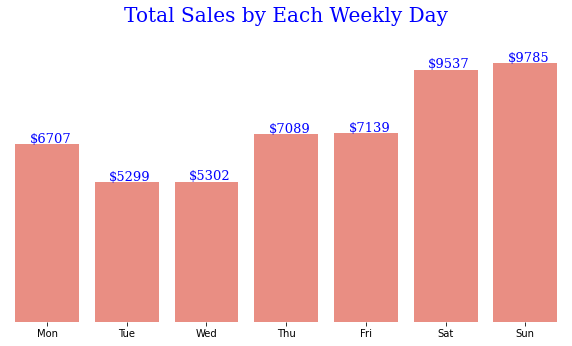

In [ ]:
res = pd.pivot_table(df, index=df.DT.dt.strftime('%a'), values = 'Price', aggfunc=np.sum).reset_index()

fig, ax = plt.subplots(1,1, figsize=(10, 5))

sns.barplot(x='DT', y='Price', data = res, color='salmon',
           order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ax=ax)

plt.title('Total Sales by Each Weekly Day\n', fontdict={'family':'serif', 'color':'blue', 'size':20})
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, bottom=True)
ax.get_yaxis().set_visible(False)

#################################################

for i in range(len(ax.get_xticklabels())):
    name  = ax.get_xticklabels()[i].get_text()
    value = float(res.Price[res.DT==name]) 
    #print(name, value)
    plt.text(i-0.22, value+50, f'${round(value)}', fontdict={'family':'serif', 'color':'blue', 'size':13})
    
for val in ax.get_xticklabels():
    print(val)
    print(val.get_text())

plt.savefig('/content/sample_data/Sales_By_Day.jpeg', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0.5)

In [ ]:
for label in ax.get_xticklabels():
  print(label)
  print(label.get_text(), end = '\n=================\n')

[pyplot.savefig() documenation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

**Create a boxplot that shows the sale by salesperson and day** 

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Price', data = df)

In [ ]:
df.Price.describe()

In [ ]:
sns.histplot(df['Price'])

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15, 6))

sns.boxplot(x='SalesPerson', 
            y='Price', 
            data = df, 
            ax = ax, 
            order=['Ahmed','Alex', 'Amanda','Anna', 'Sarah'])

sns.despine()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15, 6))

sns.boxplot(x='SalesPerson', 
            y='Price', 
            hue=df.DT.dt.strftime('%a'), 
            data = df, 
            ax = ax, 
            order=['Ahmed','Alex', 'Amanda','Anna', 'Sarah'], 
            hue_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

sns.despine()
plt.legend(loc=(1.05, 0.5))

## **6.2. Heatmaps**
<a name = 'heatmap'></a>


A heat map is another data visualization function that shows a numeric as color in two dimensions where each color corresponds to two specific values of two variables (one in x-axis and the other in y-axis). 

In [87]:
df.corr()

,Price,Cust_Satisfaction
Price,1.000000,-0.001818
Cust_Satisfaction,-0.001818,1.000000


let's create a graphical representation of the above table using heatmap function where each color shows the strength of correlation between each pair of numeric variables.

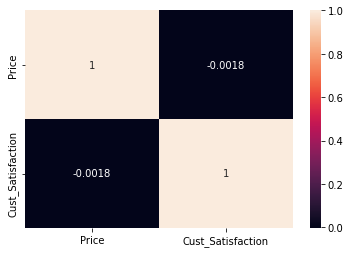

In [88]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.head(1)

,DT,Categ,SalesPerson,Price,Cust_Satisfaction
0,2022-03-02,Food,Amanda,6.100945,3.833782


In [90]:
# method 1
D = {df.Categ.unique()[i] : i for i in range(len(df.Categ.unique()))}
df['Categ_numeric'] = df.Categ.apply(lambda x : D[x])
df.head()

# method 2
new_cols = df['Categ'].astype('category').cat.codes
pd.concat([df,new_cols], axis=1)

# method 3
new_cols = pd.get_dummies(df.Categ)
pd.concat([df,new_cols], axis=1)

,DT,Categ,SalesPerson,Price,Cust_Satisfaction,Categ_numeric
0,2022-06-12,Drink,Anna,8.18,4.81,0
1,2022-10-08,Food,Anna,10.20,4.60,1
2,2022-02-14,Drink,Anna,9.97,4.77,0
3,2022-03-12,Drink,Ahmed,13.95,4.12,0
4,2022-04-26,Food,Amanda,9.39,3.60,1


In [91]:
D

{'Clothing': 4, 'Drink': 0, 'Food': 1, 'Toy': 2, 'Video Game': 3}

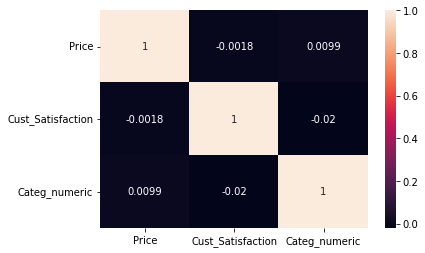

In [93]:
sns.heatmap(df.corr(), annot=True)

#### **Create a heatmap with Python**

In [94]:
# price earned each week day by each sales person:
res = pd.pivot_table(df, index='SalesPerson', columns=df.DT.dt.strftime('%a'), values = 'Price', aggfunc=np.sum )
res['Total'] =res.sum(axis=1) 
res.loc['Total'] = res.sum(axis=0)
res

DT,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Total
SalesPerson,,,,,,,,
Ahmed,1525.62,1648.32,2018.62,1891.99,1487.66,1087.26,953.05,10612.52
Alex,824.80,659.56,903.17,979.55,583.48,429.61,509.01,4889.18
Amanda,403.16,363.67,312.56,303.18,373.57,226.51,272.13,2254.78
Anna,4109.96,3954.43,5297.62,5261.02,3656.23,2642.91,3025.67,27947.84
Sarah,699.52,659.38,1045.44,1030.49,847.24,576.14,539.66,5397.87
Total,7563.06,7285.36,9577.41,9466.23,6948.18,4962.43,5299.52,51102.19


In [96]:
dd

DT,Fri,Mon,Sat,Sun,Thu,Tue,Wed
SalesPerson,,,,,,,
Ahmed,1525.62,1648.32,2018.62,1891.99,1487.66,1087.26,953.05
Alex,824.80,659.56,903.17,979.55,583.48,429.61,509.01
Amanda,403.16,363.67,312.56,303.18,373.57,226.51,272.13
Anna,4109.96,3954.43,5297.62,5261.02,3656.23,2642.91,3025.67
Sarah,699.52,659.38,1045.44,1030.49,847.24,576.14,539.66


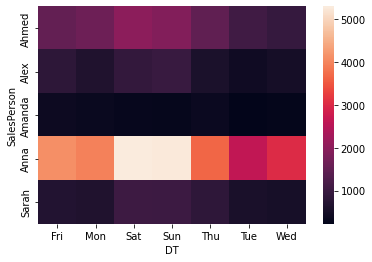

In [97]:
sns.heatmap(dd)

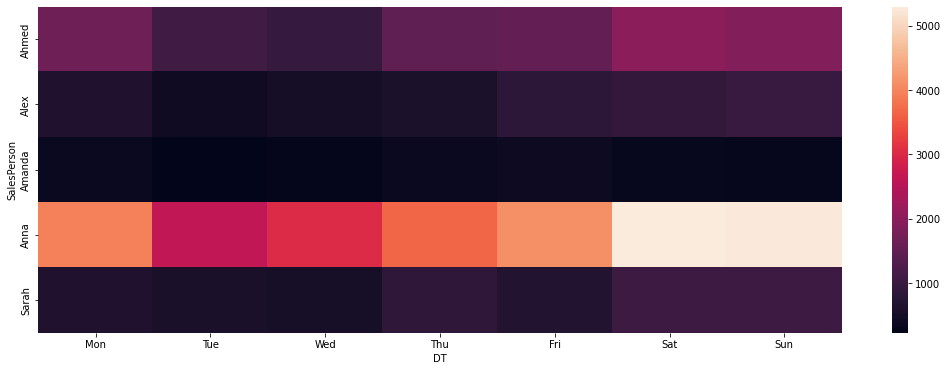

In [99]:
dd = res.drop(columns='Total')[res.index!='Total']

# reording the columns
dd = dd[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
dd = dd.astype(int)

fig, ax = plt.subplots(1,1, figsize=(18, 6))  # heatmap assigns each value to a color
sns.heatmap(dd)

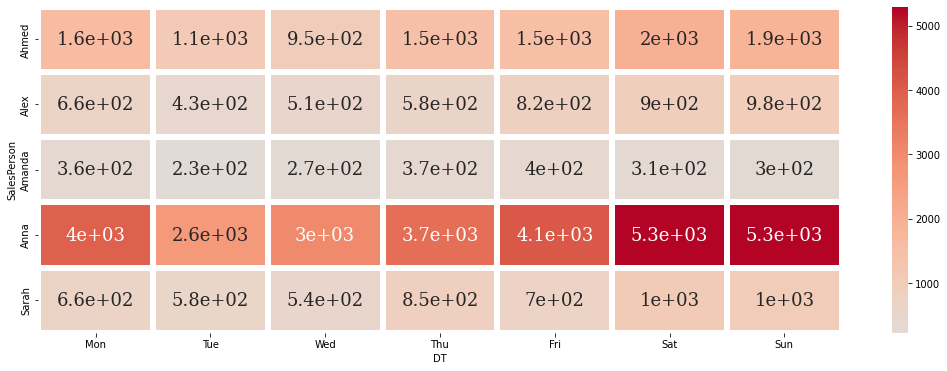

In [100]:
fig, ax = plt.subplots(1,1, figsize=(18, 6))
sns.heatmap(dd, cmap='coolwarm', center = 0, linewidth=5, annot=True, ax = ax, 
            annot_kws={'family':'serif', 'size':18})


In [102]:
ax.texts

[Text(0.5, 0.5, '$1648.000'),
 Text(1.5, 0.5, '$1087.000'),
 Text(2.5, 0.5, '$953.000'),
 Text(3.5, 0.5, '$1487.000'),
 Text(4.5, 0.5, '$1525.000'),
 Text(5.5, 0.5, '$2018.000'),
 Text(6.5, 0.5, '$1891.000'),
 Text(0.5, 1.5, '$659.000'),
 Text(1.5, 1.5, '$429.000'),
 Text(2.5, 1.5, '$509.000'),
 Text(3.5, 1.5, '$583.000'),
 Text(4.5, 1.5, '$824.000'),
 Text(5.5, 1.5, '$903.000'),
 Text(6.5, 1.5, '$979.000'),
 Text(4.5, 2.5, '$403.000'),
 Text(0.5, 3.5, '$3954.000'),
 Text(1.5, 3.5, '$2642.000'),
 Text(2.5, 3.5, '$3025.000'),
 Text(3.5, 3.5, '$3656.000'),
 Text(4.5, 3.5, '$4109.000'),
 Text(5.5, 3.5, '$5297.000'),
 Text(6.5, 3.5, '$5261.000'),
 Text(0.5, 4.5, '$659.000'),
 Text(1.5, 4.5, '$576.000'),
 Text(2.5, 4.5, '$539.000'),
 Text(3.5, 4.5, '$847.000'),
 Text(4.5, 4.5, '$699.000'),
 Text(5.5, 4.5, '$1045.000'),
 Text(6.5, 4.5, '$1030.000')]

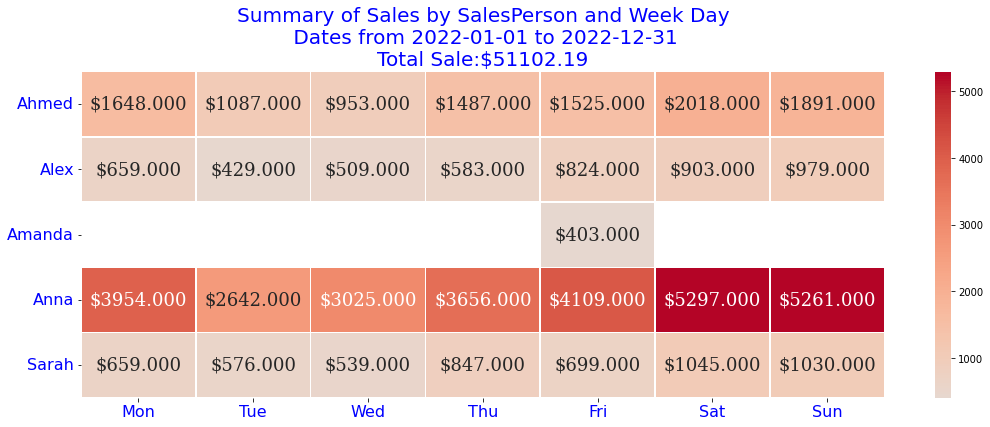

In [101]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(18, 6))
sns.heatmap(dd, cmap='coolwarm',center = 0, linewidth=0.5, annot=True, ax = ax, 
            annot_kws={'family':'serif', 'size':18}, fmt='.3f', mask=dd<400)

# setting the annotations
for t in ax.texts: 
  print(t)
  print(t.get_text())
  t.set_text('$'+t.get_text())

plt.xlabel('')
plt.ylabel('')


# setting the xticks and yticks
ax.set_xticklabels(ax.get_xticklabels(), fontdict={'size':16, 'family':'Times', 'color':'blue'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'size':16, 'family':'Times', 'color':'blue'}, rotation=0)


# setting the title
mindate = df.DT.min().strftime('%Y-%m-%d')
maxdate = df.DT.max().strftime('%Y-%m-%d')

totalsale = int(df.Price.sum().round())

plt.title(f'Summary of Sales by SalesPerson and Week Day\n Dates from {mindate} to {maxdate}\nTotal Sale:${df.Price.sum() :.2f}',
         fontdict={'size':20, 'family':'Times', 'color':'blue'}, y=1.05)

# saving the figure
plt.savefig('Heatmap.jpeg', dpi=300, bbox_inches='tight')

# bbox_inches='tight': removes all of the extra white space around your figure


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

sns.histplot()

plt.xlabel()
plt.ylabel()
plt.title()
plt.show()

## **6.3. Pie chart**
<a name = 'pie_chart'></a>


A pie chart is a circular graph to show the data distribution proportions. 

#### **Create a pie chart**

In [ ]:
# using pie chart to show the distribution ratio of each sales person
rrr = df.groupby('SalesPerson', as_index=False).Price.sum().round(2)
rrr['Ratio'] = rrr.Price/rrr.Price.sum()
rrr

,SalesPerson,Price,Ratio
0,Ahmed,9507.33,0.186623
1,Alex,5012.77,0.098397
2,Amanda,2367.82,0.046479
3,Anna,28792.37,0.565176
4,Sarah,5263.82,0.103325


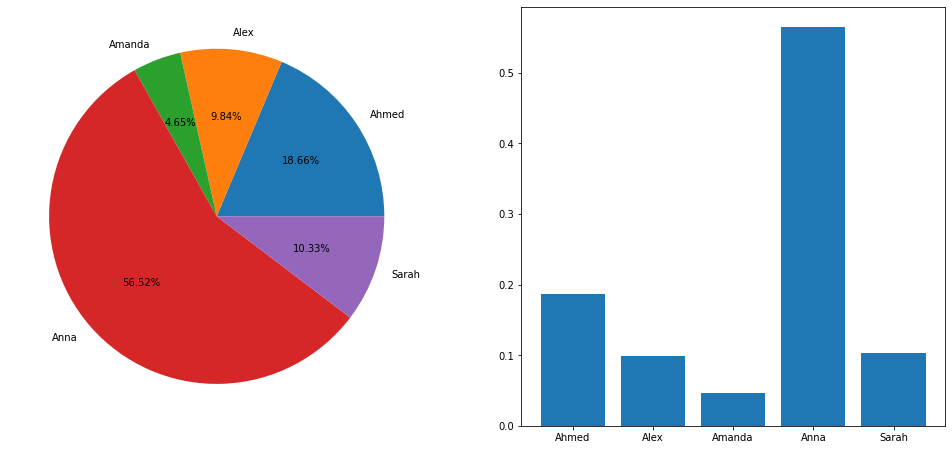

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15, 8))


ax[0].pie(rrr.Ratio, labels=rrr.SalesPerson, autopct = '%.2f%%')

ax[1].bar(rrr['SalesPerson'],rrr['Ratio'])

plt.tight_layout(pad=7, h_pad=6)
plt.show()

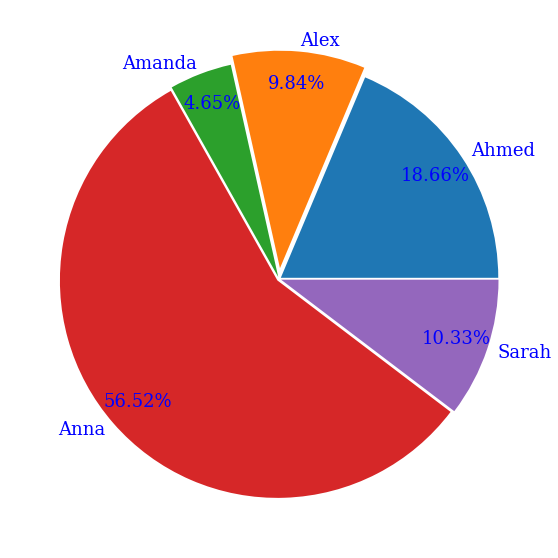

In [105]:
plt.figure(figsize=(10, 10))

x = 0.01

plt.pie(rrr.Ratio.tolist(), labels=rrr.SalesPerson.tolist(), autopct = '%.2f%%',
         startangle=0, pctdistance=0.85, explode=[x,0.05,x,x,x],
         labeldistance=1.05, textprops={'fontsize':18, 'family':'serif', 'color':'blue'})

plt.show()

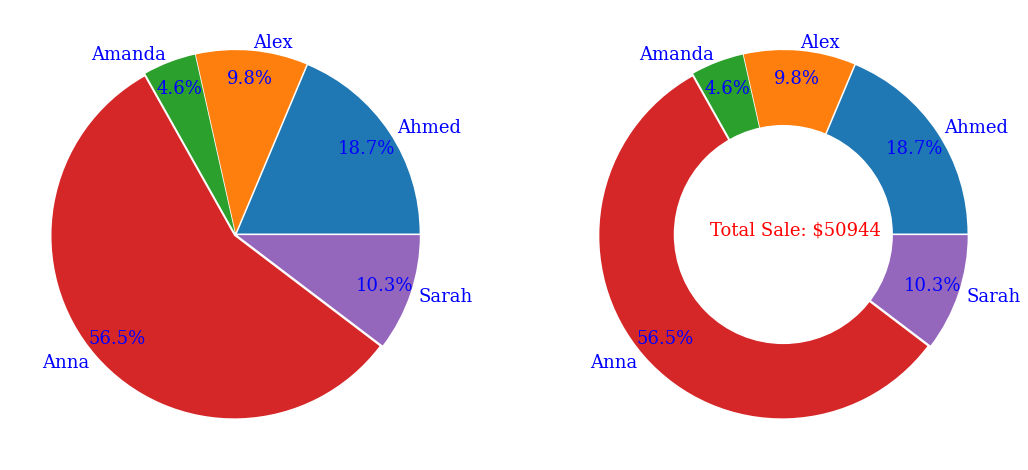

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(18, 10))

ax[0].pie(rrr.Ratio.tolist(), labels=rrr.SalesPerson.tolist(), autopct = '%1.01f%%',
         startangle=0, pctdistance=0.85, explode=[0.01]*len(rrr.SalesPerson.tolist()),
         labeldistance=1.05, textprops={'fontsize':18, 'family':'serif', 'color':'blue'})


ax[1].pie(rrr.Ratio.tolist(), labels=rrr.SalesPerson.tolist(), autopct = '%1.01f%%',
         startangle=0, pctdistance=0.85, explode=[0.01]*len(rrr.SalesPerson.tolist()),
         labeldistance=1.05, textprops={'fontsize':18, 'family':'serif', 'color':'blue'})

center_circle = plt.Circle((0,0), 0.6, fc='white')
ax[1].add_artist(center_circle)
ax[1].text(-0.4,0, f'Total Sale: ${int(df.Price.sum())}', fontdict = {'family':'serif', 'size':18, 'color':'red'})


plt.savefig('PieChart.jpeg', dpi=300, bbox_inches='tight')


In [ ]:
print([5,6]*5)

print([[()]*3 for i in range(3)])

print('str' * 3)

print((5,6)*5)

In [ ]:
fig, ax = plt.subplots(1,1)
ax.add_artist(plt.Circle((0,0), 0.6))
plt.xlim(-1,1)
plt.ylim(-1,1)